In [10]:
import numpy as np
import pandas as pd
from pathlib import Path
from DTA.plotting import *
from DTA.utils import *
from DTA.Site import Site
from DTA.SymmetricSite import SymmetricSite
from DTA.SiteAcrossReplicas import SiteAcrossReplicas
from DTA.density import *
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterExponent
my_cmap = make_custom_colormap()
plt.rcParams['axes.grid'] = False 

## EDIT THESE VARIABLES

In [ ]:
root_path = Path("/home/js2746/ELIC5/simulations/PC_CL/5%CDL/")
system_names = ["CDL1", "POPC"] # or the names of choice
leaflets = ['upp', 'low'] # analyze both leaflets (default)
replicas = ["rep2", "rep3", "rep4", "rep5"] # replicas as identified in the "root" directory
helix_definitions = root_path.joinpath(replicas[0]) #where are the coordinates for the transmembrane helices?
max_enrichment = 3 # how high do you want your heat map to go?

## EXECUTE THIS CELL TO MAKE A HEATMAP

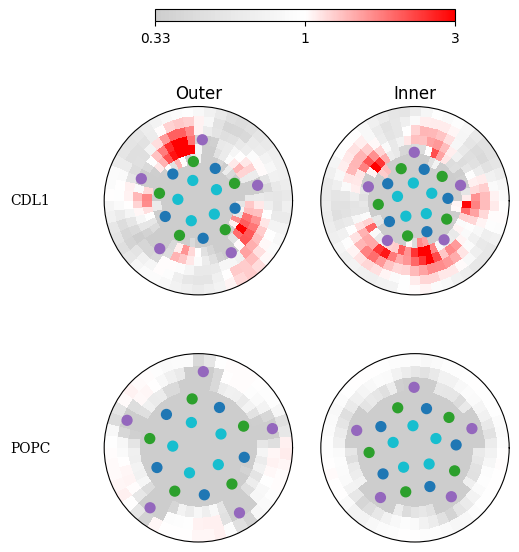

In [ ]:
colorbar_range = (1 / max_enrichment, 1, max_enrichment) # min, middle value, and max, respectively
helices = load_inclusion_helices(helix_definitions)
fig1, axes = create_heatmap_figure_and_axes(system_names, my_cmap, colorbar_range, figwidth=6, figheight=6, helices=helices)
index = 0
for species in system_names:
    for leaf in leaflets:
        rep_list = []
        for rep in replicas:
            rep_path = root_path.joinpath(rep, f"{species}.{leaf}.avg.dat")
            counts, grid_dims, system_info = parse_tcl_dat_file(rep_path, bulk=False)
            density_enrichment = calculate_density_enrichment(calculate_density(counts, grid_dims), system_info.ExpBeadDensity)
            rep_list.append(density_enrichment)
        avg_enrichment = np.mean(np.stack(tuple(rep_list), axis=0), axis=0)
        
        axes[index] = plot_heatmap(axes[index], avg_enrichment, grid_dims, my_cmap, colorbar_range)
        index += 1
fig1 = make_colorbar(fig1, colorbar_range, my_cmap)
plt.savefig(root_path.joinpath("enrichments.pdf"), bbox_inches='tight')
        
        

## CHOOSE A SITE (OR SITES)

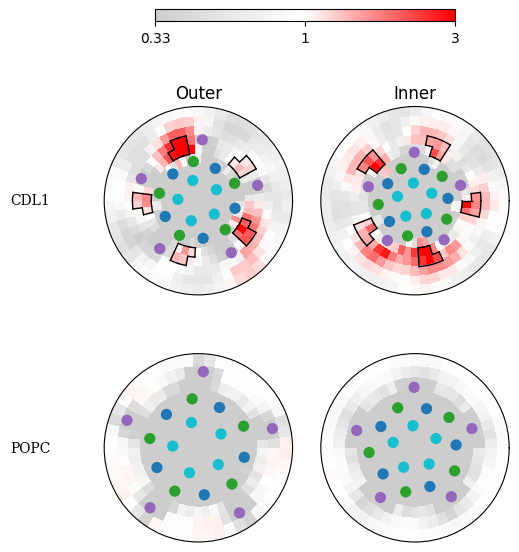

In [ ]:
site1 = Site(name="inner_M1_M4", leaflet_id=2, temperature=320)
site2 = Site(name="outer_M3_M4", leaflet_id=1, temperature=320)
site1.bin_coords = [(5, 8), (5, 9), (6, 9), (6, 8), (6, 10)]
site2.bin_coords = [(5, 4), (5, 5), (5, 6), (6, 5), (6, 4)]
symm_site1 = SymmetricSite(symmetry=5, base_site=site1, Ntheta=grid_dims.Ntheta)
symm_site2 = SymmetricSite(symmetry=5, base_site=site2, Ntheta=grid_dims.Ntheta)

fig1, axes = create_heatmap_figure_and_axes(system_names, my_cmap, colorbar_range, figwidth=6, figheight=6, helices=helices)
index = 0
for species in system_names:
    for leaf in leaflets:
        rep_list = []
        for rep in replicas:
            rep_path = root_path.joinpath(rep, f"{species}.{leaf}.avg.dat")
            counts, grid_dims, system_info = parse_tcl_dat_file(rep_path, bulk=False)
            density_enrichment = calculate_density_enrichment(calculate_density(counts, grid_dims), system_info.ExpBeadDensity)
            rep_list.append(density_enrichment)
        avg_enrichment = np.mean(np.stack(tuple(rep_list), axis=0), axis=0)
        
        axes[index] = plot_heatmap(axes[index], avg_enrichment, grid_dims, my_cmap, colorbar_range)
        index += 1
fig1 = make_colorbar(fig1, colorbar_range, my_cmap)
axes[1] = outline_site(axes[1], symm_site1, grid_dims)
axes[0] = outline_site(axes[0], symm_site2, grid_dims)
plt.savefig(root_path.joinpath("enrichments_withSites.pdf"), bbox_inches='tight')




## Find accessible area

First guess for accessible area is geometric area:
92.6769832808989


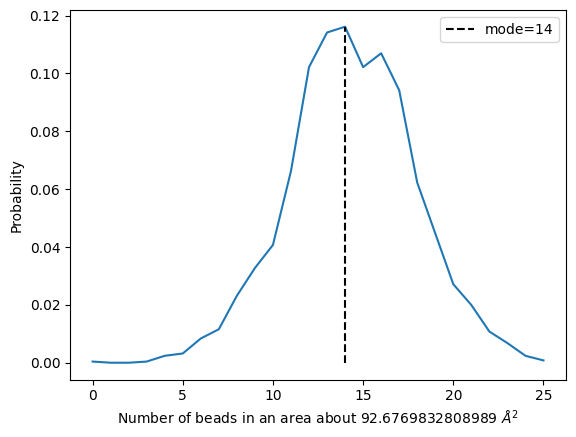

In [ ]:
DPPC_root = Path("/home/js2746/ELIC5/simulations/DPPC/")
DPPC_bulk_root = Path("/home/js2746/ELIC5/simulations/DPPC_bulk/")

DPPC = DPPC_root_path.joinpath(f"DPPC.upp.dat")
DPPC_counts, grid_dims, system_info = parse_tcl_dat_file(DPPC, bulk=False)
DPPC_site1 = Site(name="M4M3_outer", leaflet_id=1, temperature=320)
DPPC_site1.bin_coords = [(5, 4), (5, 5), (5, 6), (6, 5), (6, 4)]
DPPC_symm_site1 = SymmetricSite(symmetry=5, base_site=DPPC_site1, Ntheta=grid_dims.Ntheta)
DPPC_symm_site1.update_counts_histogram(bulk=False, counts_data=DPPC_counts)
print("First guess for accessible area is geometric area:")
geom_area = DPPC_site1.calculate_geometric_area(grid_dims.dr, grid_dims.dtheta)
print(geom_area)
fig,ax = plt.subplots()
ax = plot_histogram(ax, DPPC_symm_site1.site_counts_histogram, geom_area, plot_probability=True)
plt.show()
plt.clf()
plt.close()


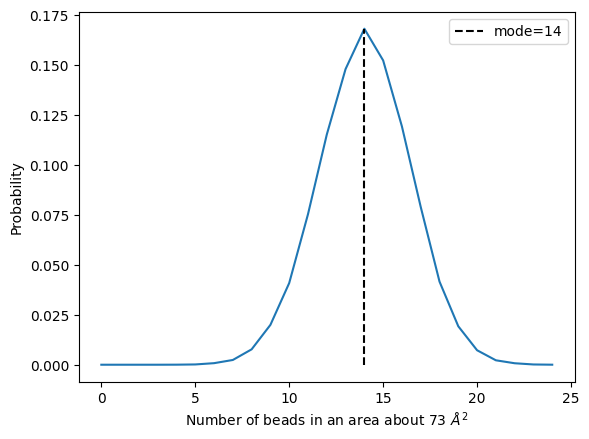

73.0


In [ ]:
DPPC_bulk_counts, _, _ = parse_tcl_dat_file(DPPC_bulk_root_path.joinpath("DPPC_counts_73.out"), bulk=True)
DPPC_symm_site.update_counts_histogram(True, DPPC_bulk_counts)
fig2,ax2 = plt.subplots()
ax2 = plot_histogram(ax2, DPPC_symm_site.bulk_counts_histogram, "73", plot_probability=True)
plt.show()
plt.clf()
plt.close()
print(DPPC_symm_site.predict_accessible_area(73))

First guess for accessible area is geometric area:
95.81857593448869


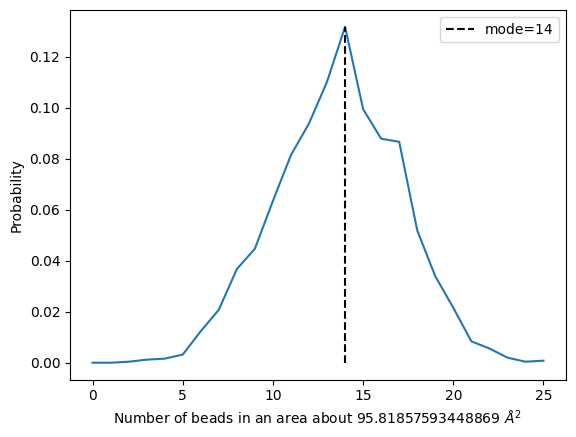

In [25]:
DPPC_site2 = Site(name="M4M1_inner", leaflet_id=2, temperature=320)
DPPC_site2.bin_coords = [(5, 8), (5, 9), (6, 9), (6, 8), (6, 10)]
DPPC_symm_site2 = SymmetricSite(symmetry=5, base_site=DPPC_site2, Ntheta=grid_dims.Ntheta)
DPPC_symm_site2.update_counts_histogram(bulk=False, counts_data=DPPC_counts)
print("First guess for accessible area is geometric area:")
geom_area = DPPC_site2.calculate_geometric_area(grid_dims.dr, grid_dims.dtheta)
print(geom_area)
fig,ax = plt.subplots()
ax = plot_histogram(ax, DPPC_symm_site2.site_counts_histogram, geom_area, plot_probability=True)
plt.show()
plt.clf()
plt.close()

## Now do DTA

[128748    850      2]


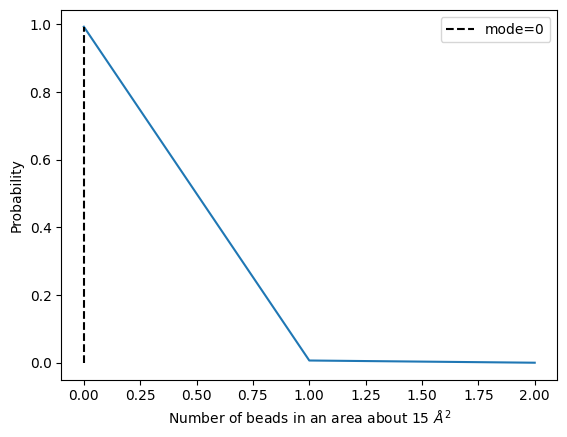

In [ ]:
CDL1_bulk_counts_path = root_path.joinpath("bulk", "HG_only_DTA", "ACA_counts_15.out")

ACA_bulk_counts, _, _ = parse_tcl_dat_file(ACA_bulk_counts_path, bulk=True)
ACN_bulk_counts, _, _ = parse_tcl_dat_file(ACN_bulk_counts_path, bulk=True)

replica_counts_list = []
for rep in replicas:
    counts, grid_dims, system_info = parse_tcl_dat_file(root_path.joinpath(rep, "HG_only_DTA", "ACA.upp.dat"), bulk=False)
    replica_counts_list.append(counts)

ACA = SiteAcrossReplicas(replica_counts_list, base_site=symm_site1)

replica_counts_list = []
for rep in replicas:
    counts, grid_dims, system_info = parse_tcl_dat_file(root_path.joinpath(rep, "HG_only_DTA", "ACN.upp.dat"), bulk=False)
    replica_counts_list.append(counts)

ACN = SiteAcrossReplicas(replica_counts_list, base_site=symm_site2)

ACA.update_counts_histogram(bulk=True, counts_data=ACA_bulk_counts)
ACN.update_counts_histogram(bulk=True, counts_data=ACN_bulk_counts)
fig3, ax3 = plt.subplots()
ax3 = plot_histogram(ax3, ACA.bulk_counts_histogram, 15, plot_probability=True)
print(ACA.bulk_counts_histogram)


[128744    856]


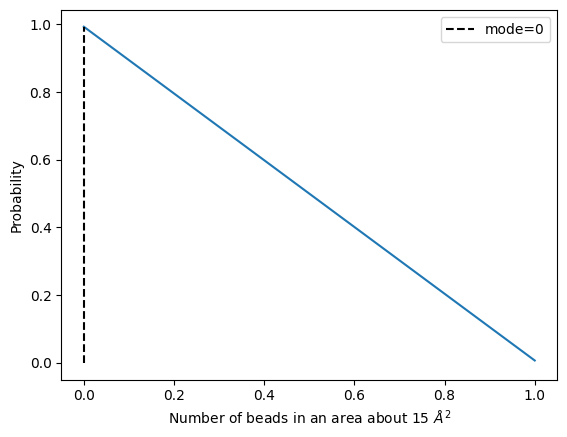

In [90]:
fig4, ax4 = plt.subplots()
ax4 = plot_histogram(ax4, ACN.bulk_counts_histogram, 15, plot_probability=True)
print(ACN.bulk_counts_histogram)


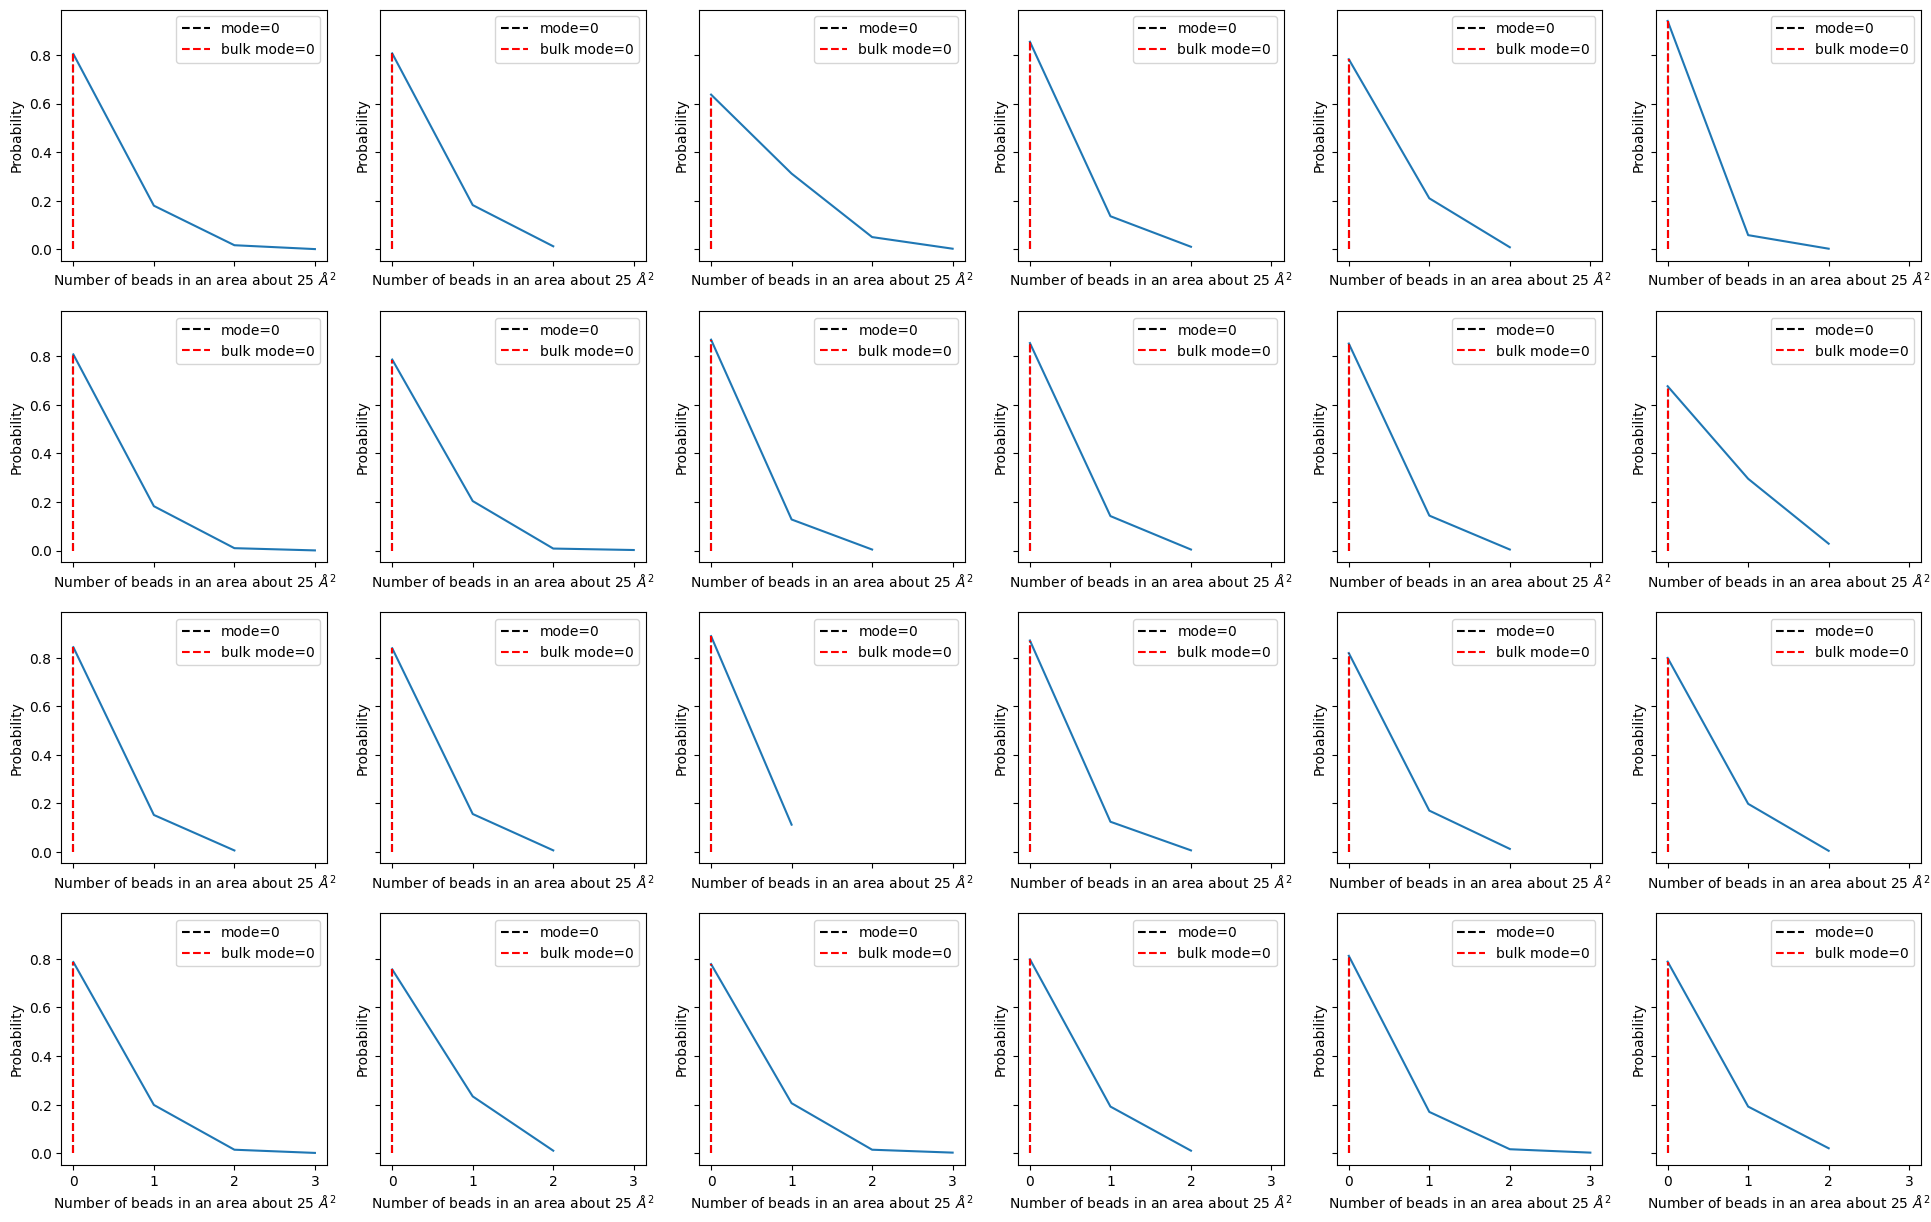

In [91]:
fig3, axes = plt.subplots(len(replicas), symm_site1.symmetry + 1, figsize=(24,15), sharex=True, sharey=True)
for rep in range(len(replicas)):
    axiscol = 0
    axes[rep][axiscol] = plot_histogram(axes[rep][axiscol], ACA.get_site_list[rep].site_counts_histogram, 25, bulk_mode=ACA.n_peak, plot_probability=True)
    axiscol += 1
    for site in ACA.get_site_list[rep]:
        axes[rep][axiscol] = plot_histogram(axes[rep][axiscol], site.site_counts_histogram, 25, bulk_mode=site.n_peak, plot_probability=True)
        axiscol+=1

In [92]:
dgSite = float(calculate_dG(ACA.site_counts_histogram, ACA.n_peak, 320))
dgRef = float(calculate_dG(ACA.bulk_counts_histogram, ACA.n_peak, 320))
print(f"dGcalc ={dgSite} kcal/mol")
print(f"dGref ={dgRef} kcal/mol")
print(f"dG is {ACA.dG} kcal/mol")
print(f"error is plus or minus {ACA.dG_std} kcal/mol")


dGcalc =0.9232245308145667 kcal/mol
dGref =3.1909894896893576 kcal/mol
dG is -2.267764958874791 kcal/mol
error is plus or minus 0.08678923763271332 kcal/mol


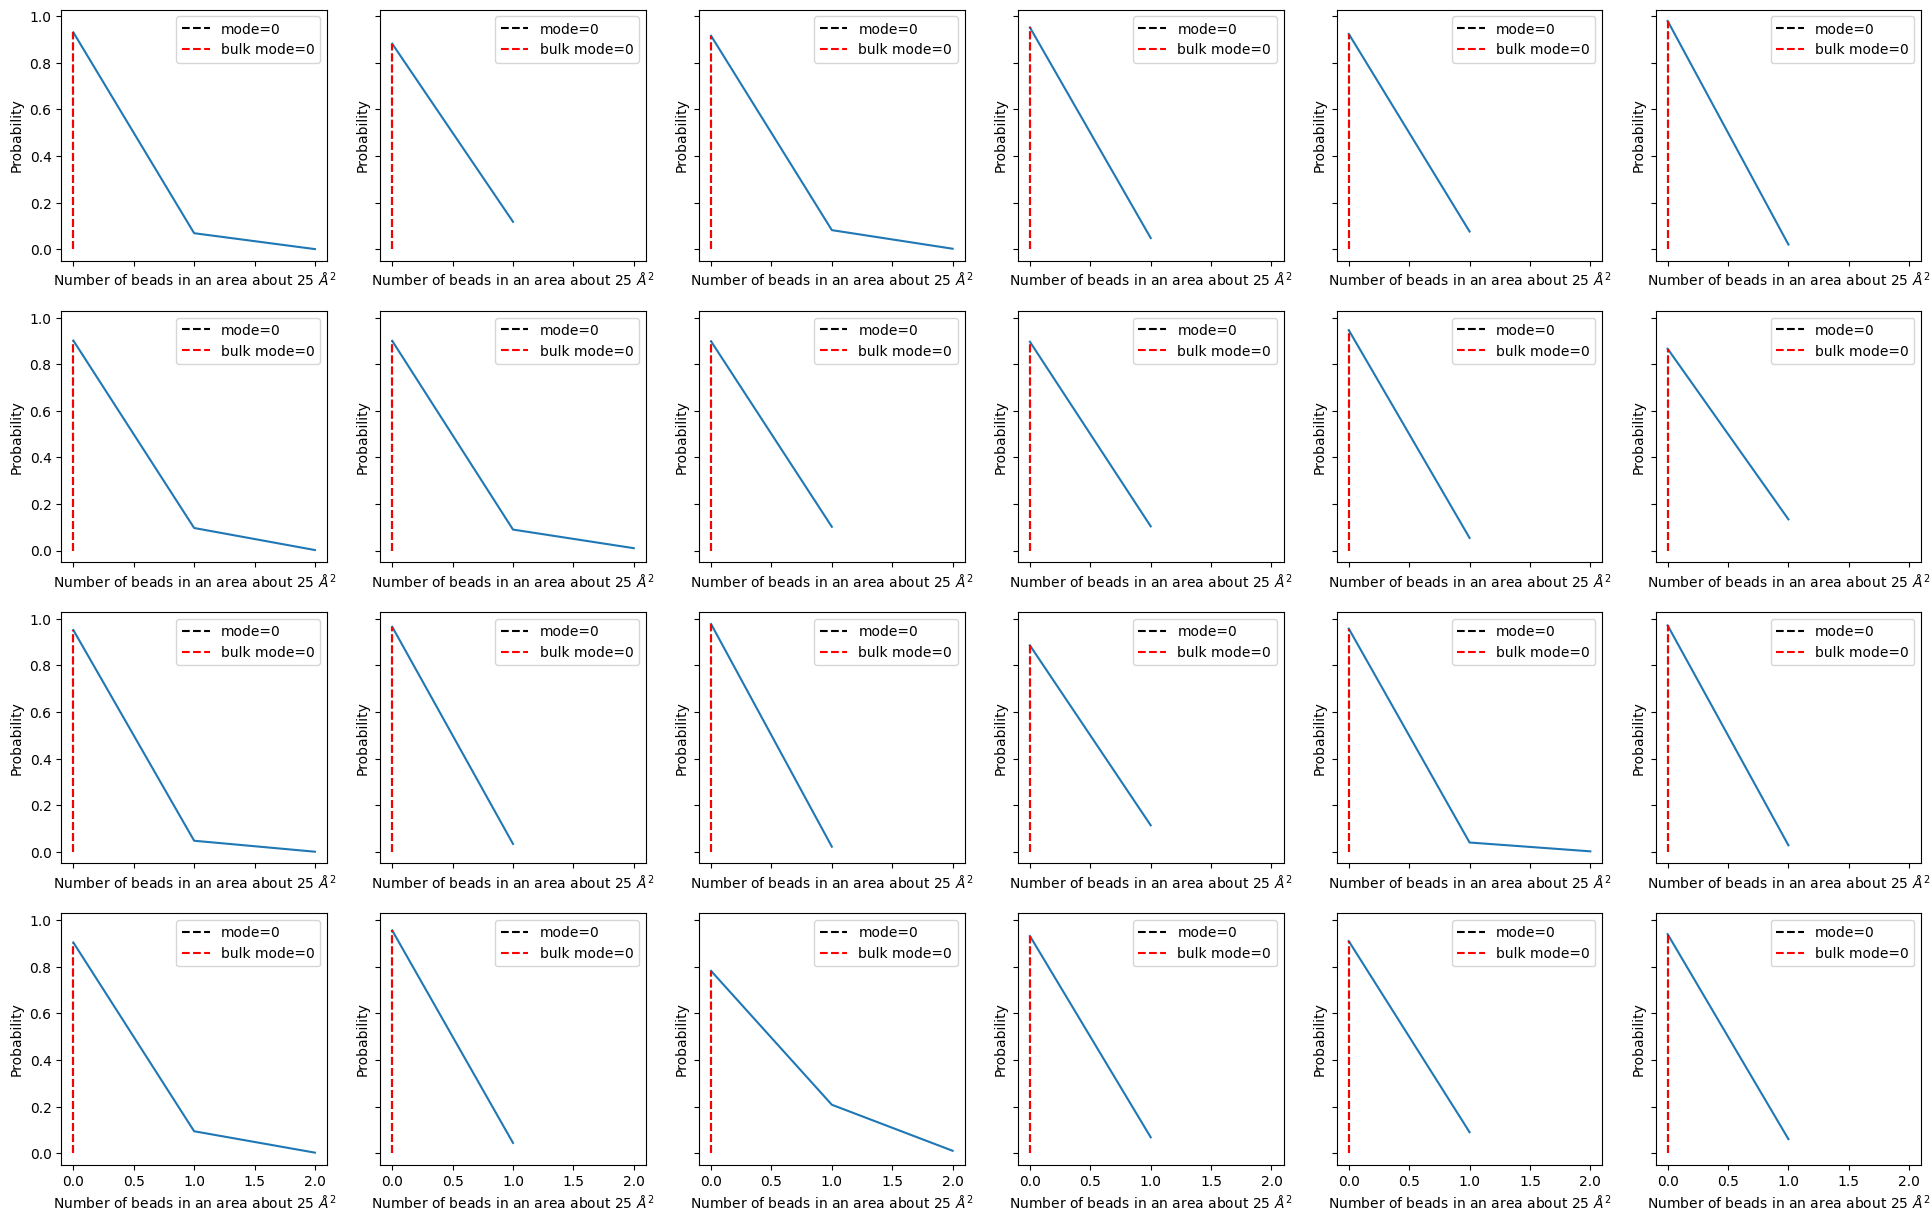

In [93]:
fig5, axes = plt.subplots(len(replicas), symm_site2.symmetry + 1, figsize=(24,15), sharex=True, sharey=True)
for rep in range(len(replicas)):
    axiscol = 0
    axes[rep][axiscol] = plot_histogram(axes[rep][axiscol], ACN.get_site_list[rep].site_counts_histogram, 25, bulk_mode=ACN.n_peak, plot_probability=True)
    axiscol += 1
    for site in ACN.get_site_list[rep]:
        axes[rep][axiscol] = plot_histogram(axes[rep][axiscol], site.site_counts_histogram, 25, bulk_mode=site.n_peak, plot_probability=True)
        axiscol+=1

In [94]:
dgSite = float(calculate_dG(ACN.site_counts_histogram, ACN.n_peak, 320))
dgRef = float(calculate_dG(ACN.bulk_counts_histogram, ACN.n_peak, 320))
print(f"dGcalc ={dgSite} kcal/mol")
print(f"dGref ={dgRef} kcal/mol")
print(f"dG is {ACN.dG} kcal/mol")
print(f"error is plus or minus {ACN.dG_std} kcal/mol")


dGcalc =1.5719601202087095 kcal/mol
dGref =3.187991247896336 kcal/mol
dG is -1.6160311276876267 kcal/mol
error is plus or minus 0.20030321000067589 kcal/mol


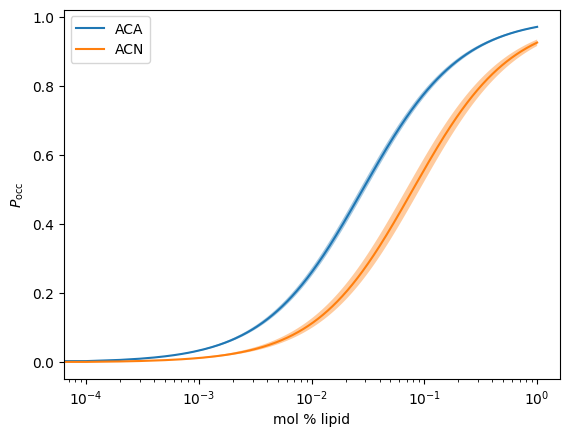

In [95]:
fig7, ax7 = plt.subplots()
ax7 = plot_titration_curve(ax7, ACA.dG, ACA.dG_std, 320, "ACA", True, 'CI', 20)
ax7 = plot_titration_curve(ax7, ACN.dG, ACN.dG_std, 320, "ACN", True, 'CI', 20)
ax7.set_xscale('log')
ax7.legend()
ax7.set_xlabel('mol % lipid')
ax7.set_ylabel(r'$P_{\mathrm{occ}}$')
plt.show()